
## Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Some relevant columns in the dataset:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


### Importing All the necessary Libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

### Load Dataset

In [2]:
df = pd.read_csv("avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## EDA(Exploratory Data Analysis)

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 18249 rows and 14 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("these are the columns present in the dataset:  \n\n",df.columns)

these are the columns present in the dataset:  

 Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [6]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [7]:
# checking duplicate values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 0 Nulls present in the dataset


<AxesSubplot:>

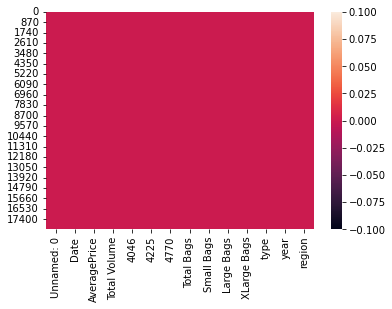

In [8]:
# Heatmap of null values
sns.heatmap(df.isnull())

In [9]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observation:
- There are float64(9), int64(2), object(3) are present in dataset

##### Changing Date columns Datatype and creat saperate columns for each

In [10]:
# Changing Date columns Datatype and creat saperate columns for each

df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for year, month, and day
#df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


Here i am not taking year column because year column is already present in our dataset

In [11]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


In [12]:
# now i am deleting Unnamed: 0 column because it is representing only index number 
#I am also deleting Date column because I have already made two more columns from this one
df.drop(['Unnamed: 0','Date'], axis=1, inplace=True)

In [13]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


In [14]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


now i have float64(9), int64(3), object(2) are present in my data

In [15]:
#describing data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Observation:

Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

- Also, number of rows in each column are same, means there are no null values in the data set.
- Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
- Most of the column statistics data are near to 0 values.
- By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

### Taking Insights By visualizing the Data

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

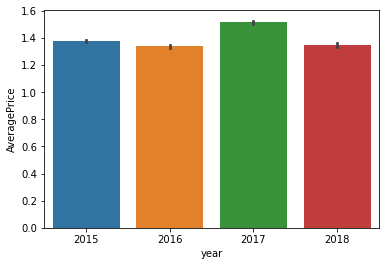

In [16]:
#checking ratio of year and price 
sns.barplot(x='year',y='AveragePrice',data=df)

Observation:

by seeing this it is known that the price was highest in 2017

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

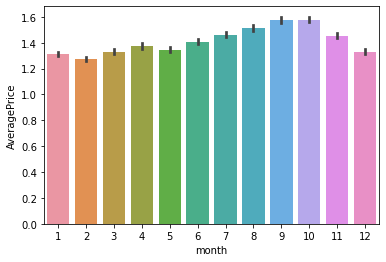

In [17]:
#checking ratio of month and price
sns.barplot(x='month',y='AveragePrice',data=df)

Observation:
- Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.
- September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.

##### Ploting Lineplot

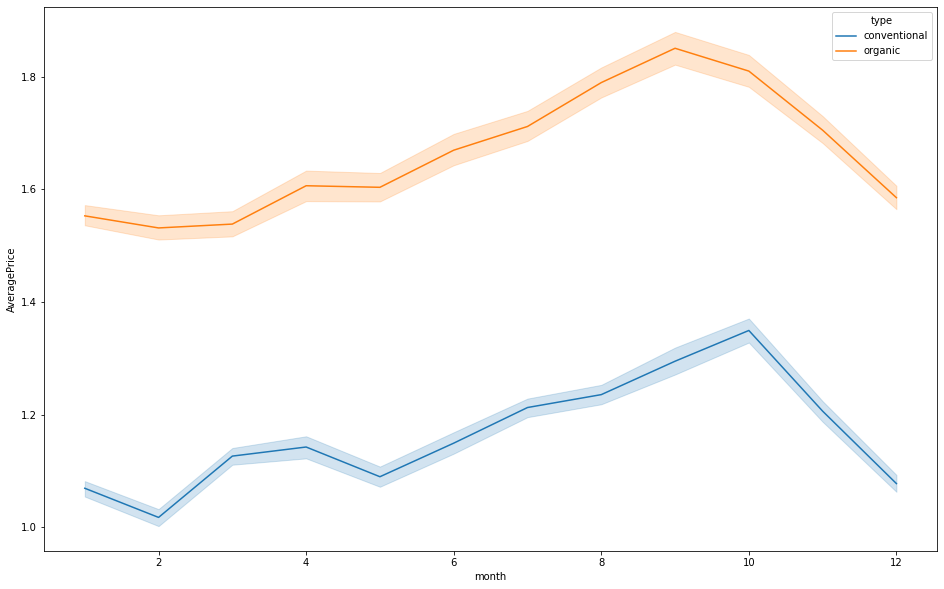

In [18]:
plt.figure(figsize=(16,10))
sns.lineplot(x='month',y='AveragePrice',data=df,hue='type')
plt.show()

- There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
- Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

##### Ploting histplot for univariate analysis

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

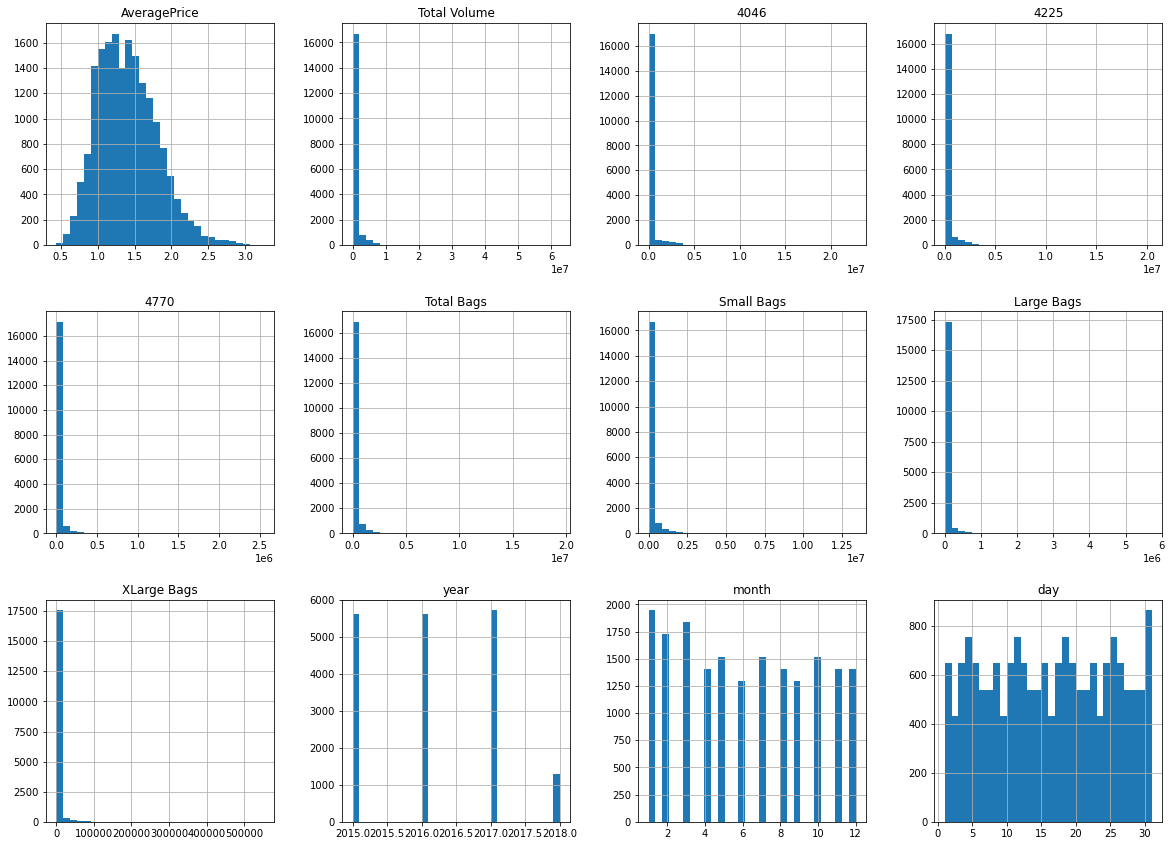

In [19]:
# Ploting histplot for univariate analysis
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

- Average price column is normally distributing over the histogram.
- Rest of the data are not much varying in term of numbers, so they are almost left skewed data
- To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

##### Separate numerical and categorical columns for better visualization

In [20]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

##### Plotting Distribution Plot

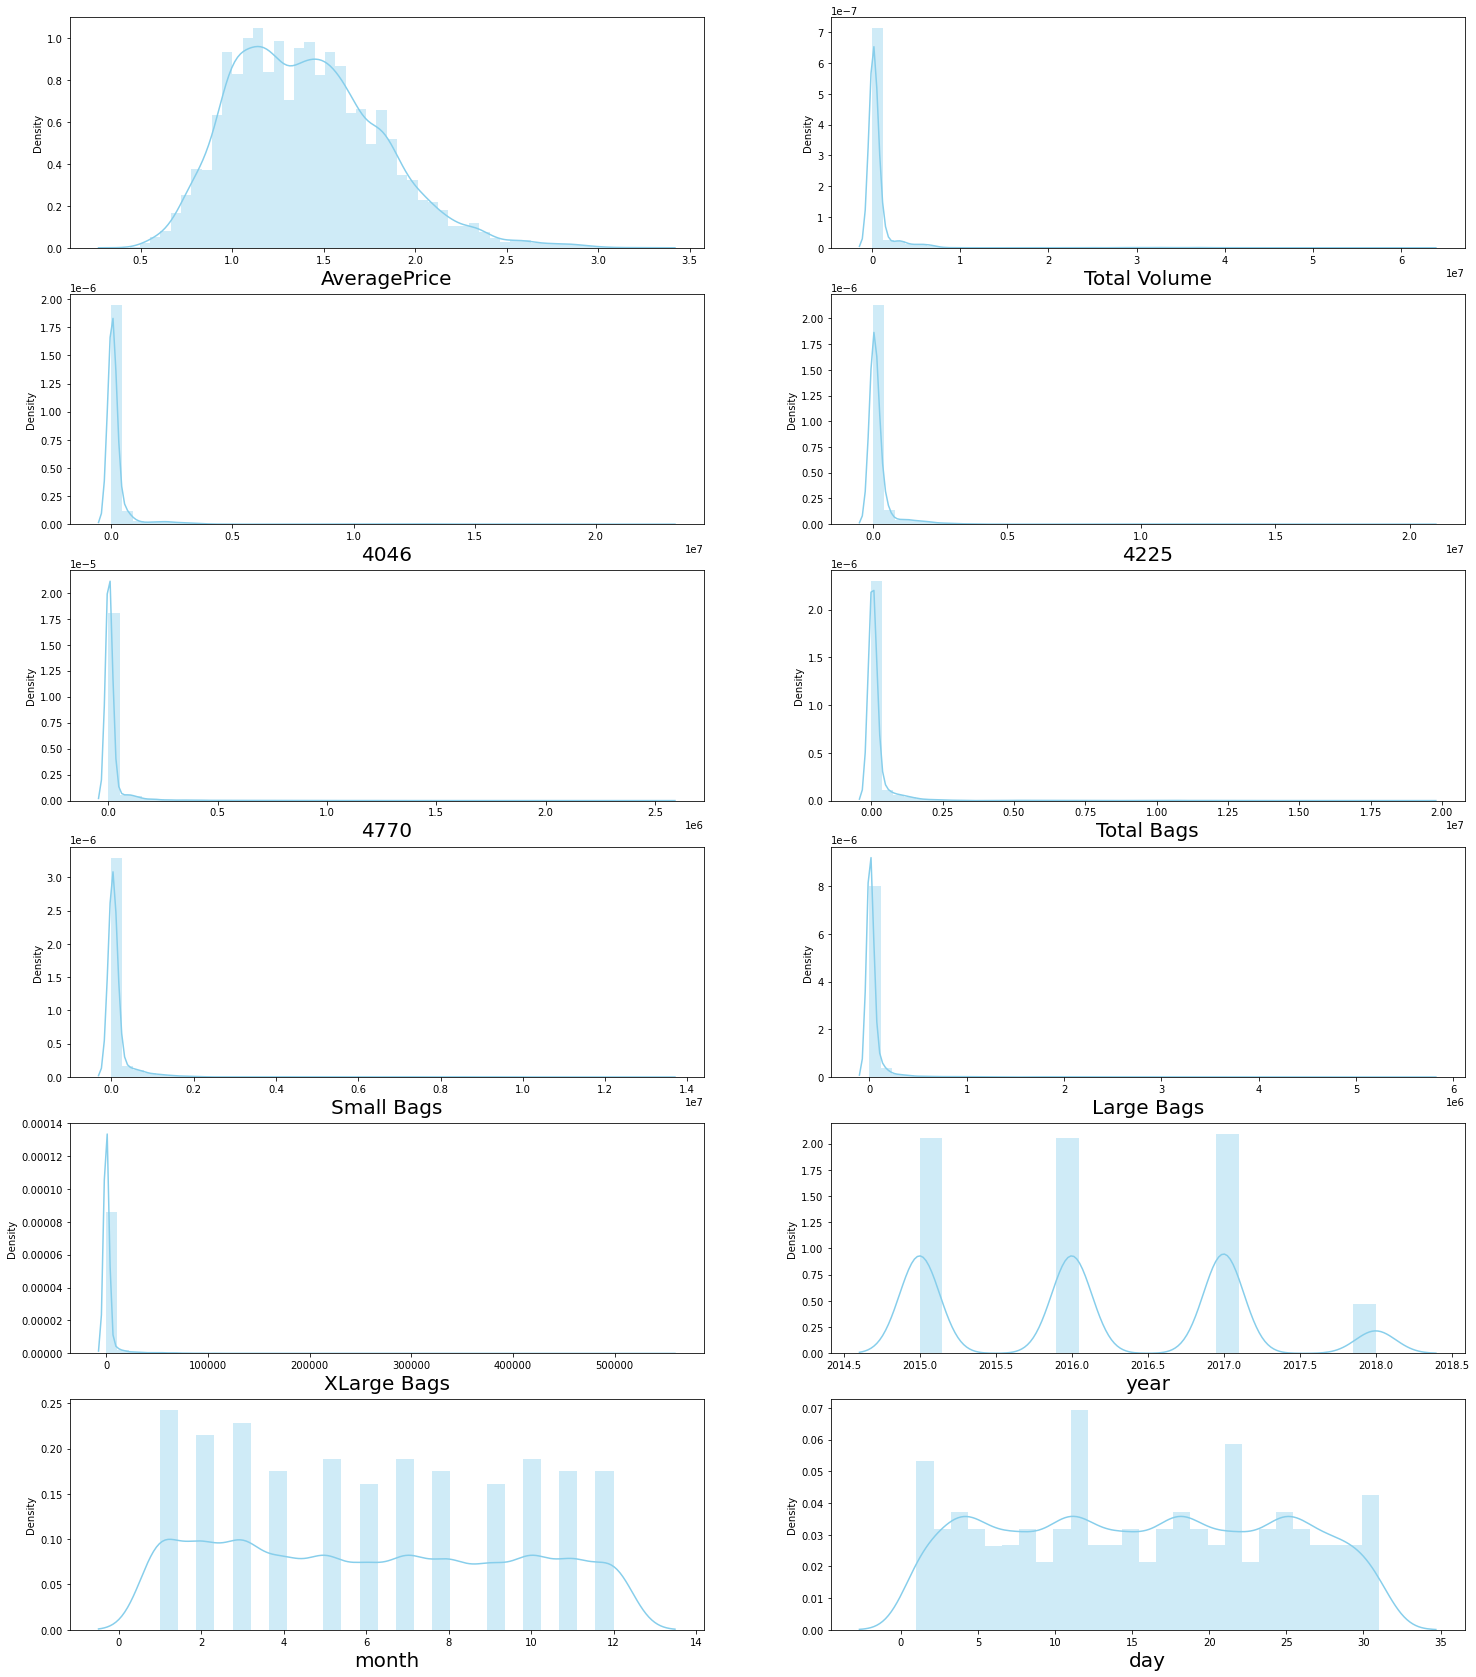

In [21]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

##### Plotting Boxplot For seeing Outliers

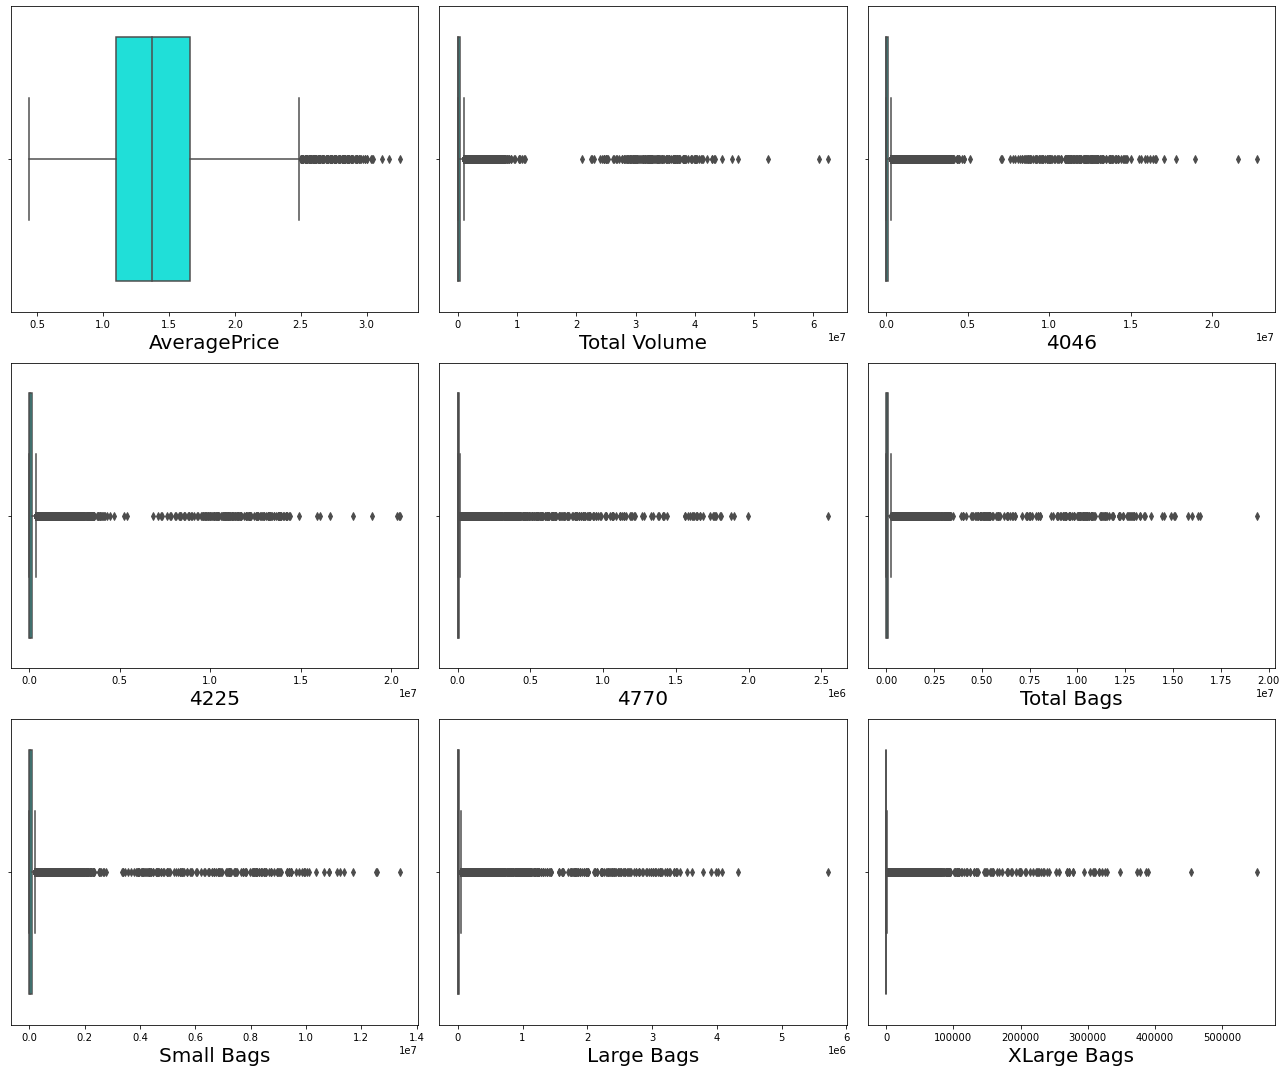

In [22]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

There are many outliers are present in every column

In [23]:
# value counts of type
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

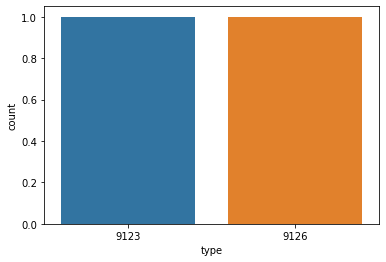

In [24]:
sns.countplot(df['type'].value_counts())

Observation:
- in type columns there are 2 unique values are present 'conventional' and    'organic'         

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

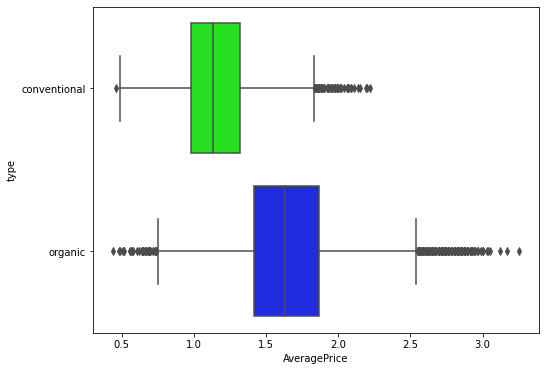

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

- Oraganic Avocado is almost 43% more costlier than conventional Avacado.
- We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
- This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

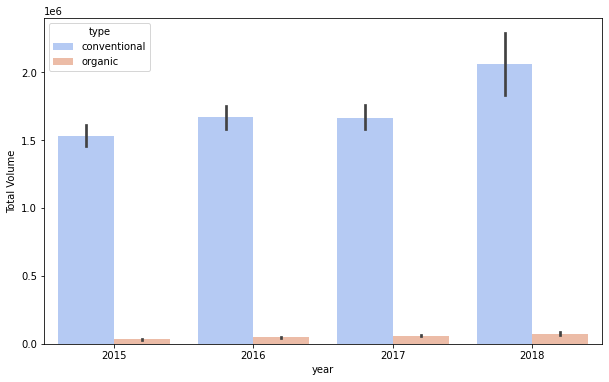

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

- The sell of organic avacodo is less than 3 %.
- Conventional Avacado are in more demand.
- Barplot confirm same thing in yearwise sales volume.

##### The Average price varies over year and season , lets dive to get some more insight over it.

In [27]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [28]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

- Oraganic Avocado is 40-50% costlier than conventional avacado.
- Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.
- Except 2017 each year their is incresase in price of avacado.

In [29]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


In [30]:
# Checking unique values and Yearwise total No of sale entry
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

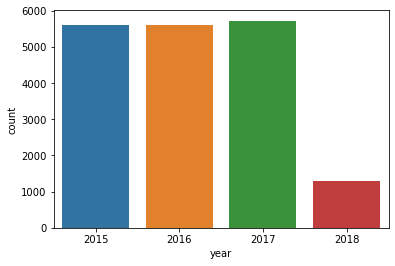

In [31]:
sns.countplot('year',data=df)

- This dataset contain data from 2015 to 2018
- Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.

#### Checking Month-Wise sales entries

<AxesSubplot:xlabel='month', ylabel='count'>

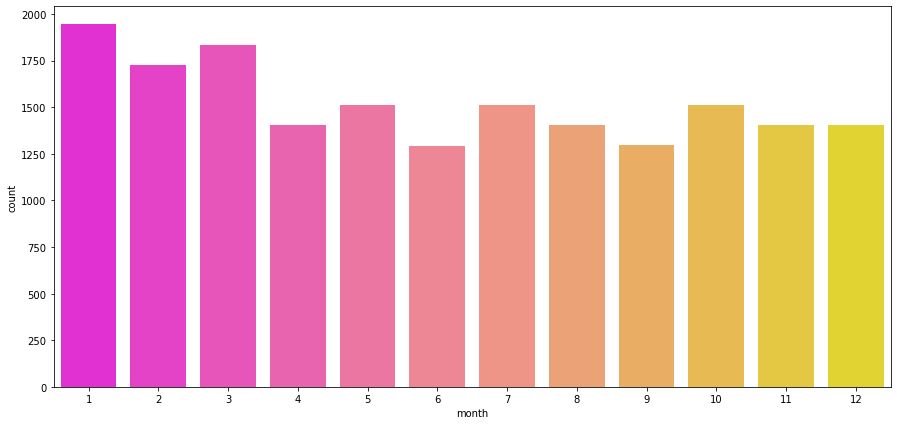

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='month', data=df, palette="spring")

- Maximum sales lead comes in month of Jan, Feb, March
- Maximum sales demand of Avacodo is in month of Jan  & Minimum sales demand of Avacoda is in month of June

#### Checking Month-Wise Variation in Average Price

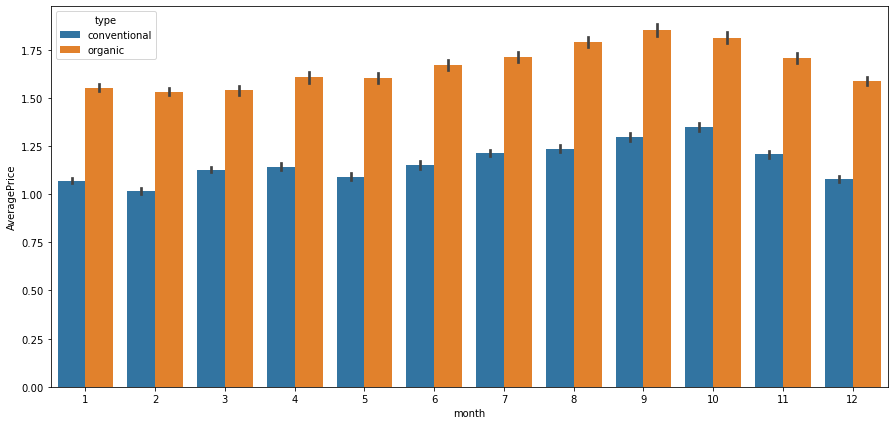

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x="month", y="AveragePrice", hue='type', data=df)
plt.show()

- In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.
- Opposite of it true in duration of Jan to March.
- This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.

#### Now explore Region

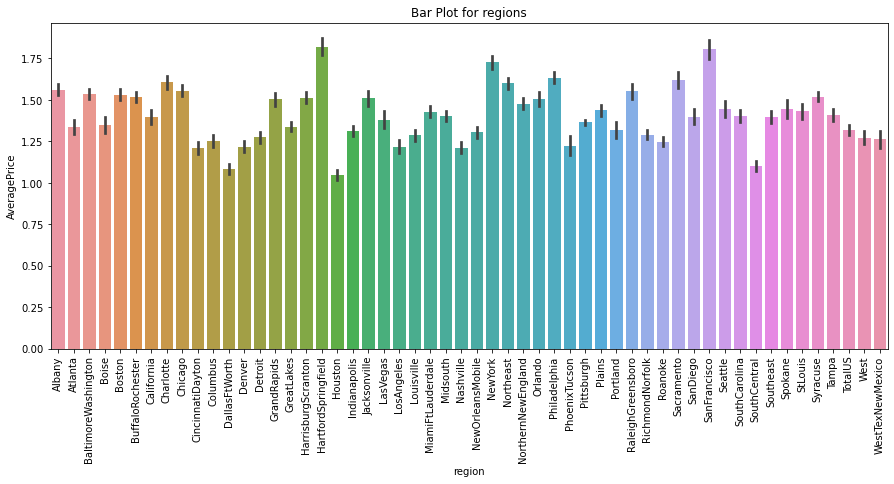

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

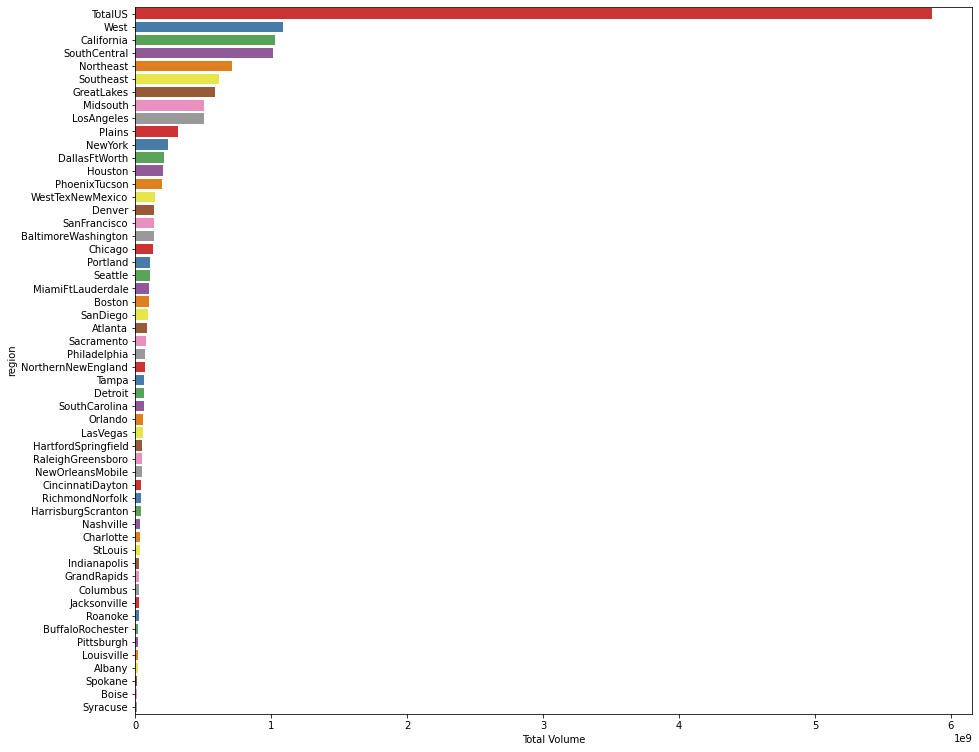

In [35]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

- Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
- Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston

#### Pairplot

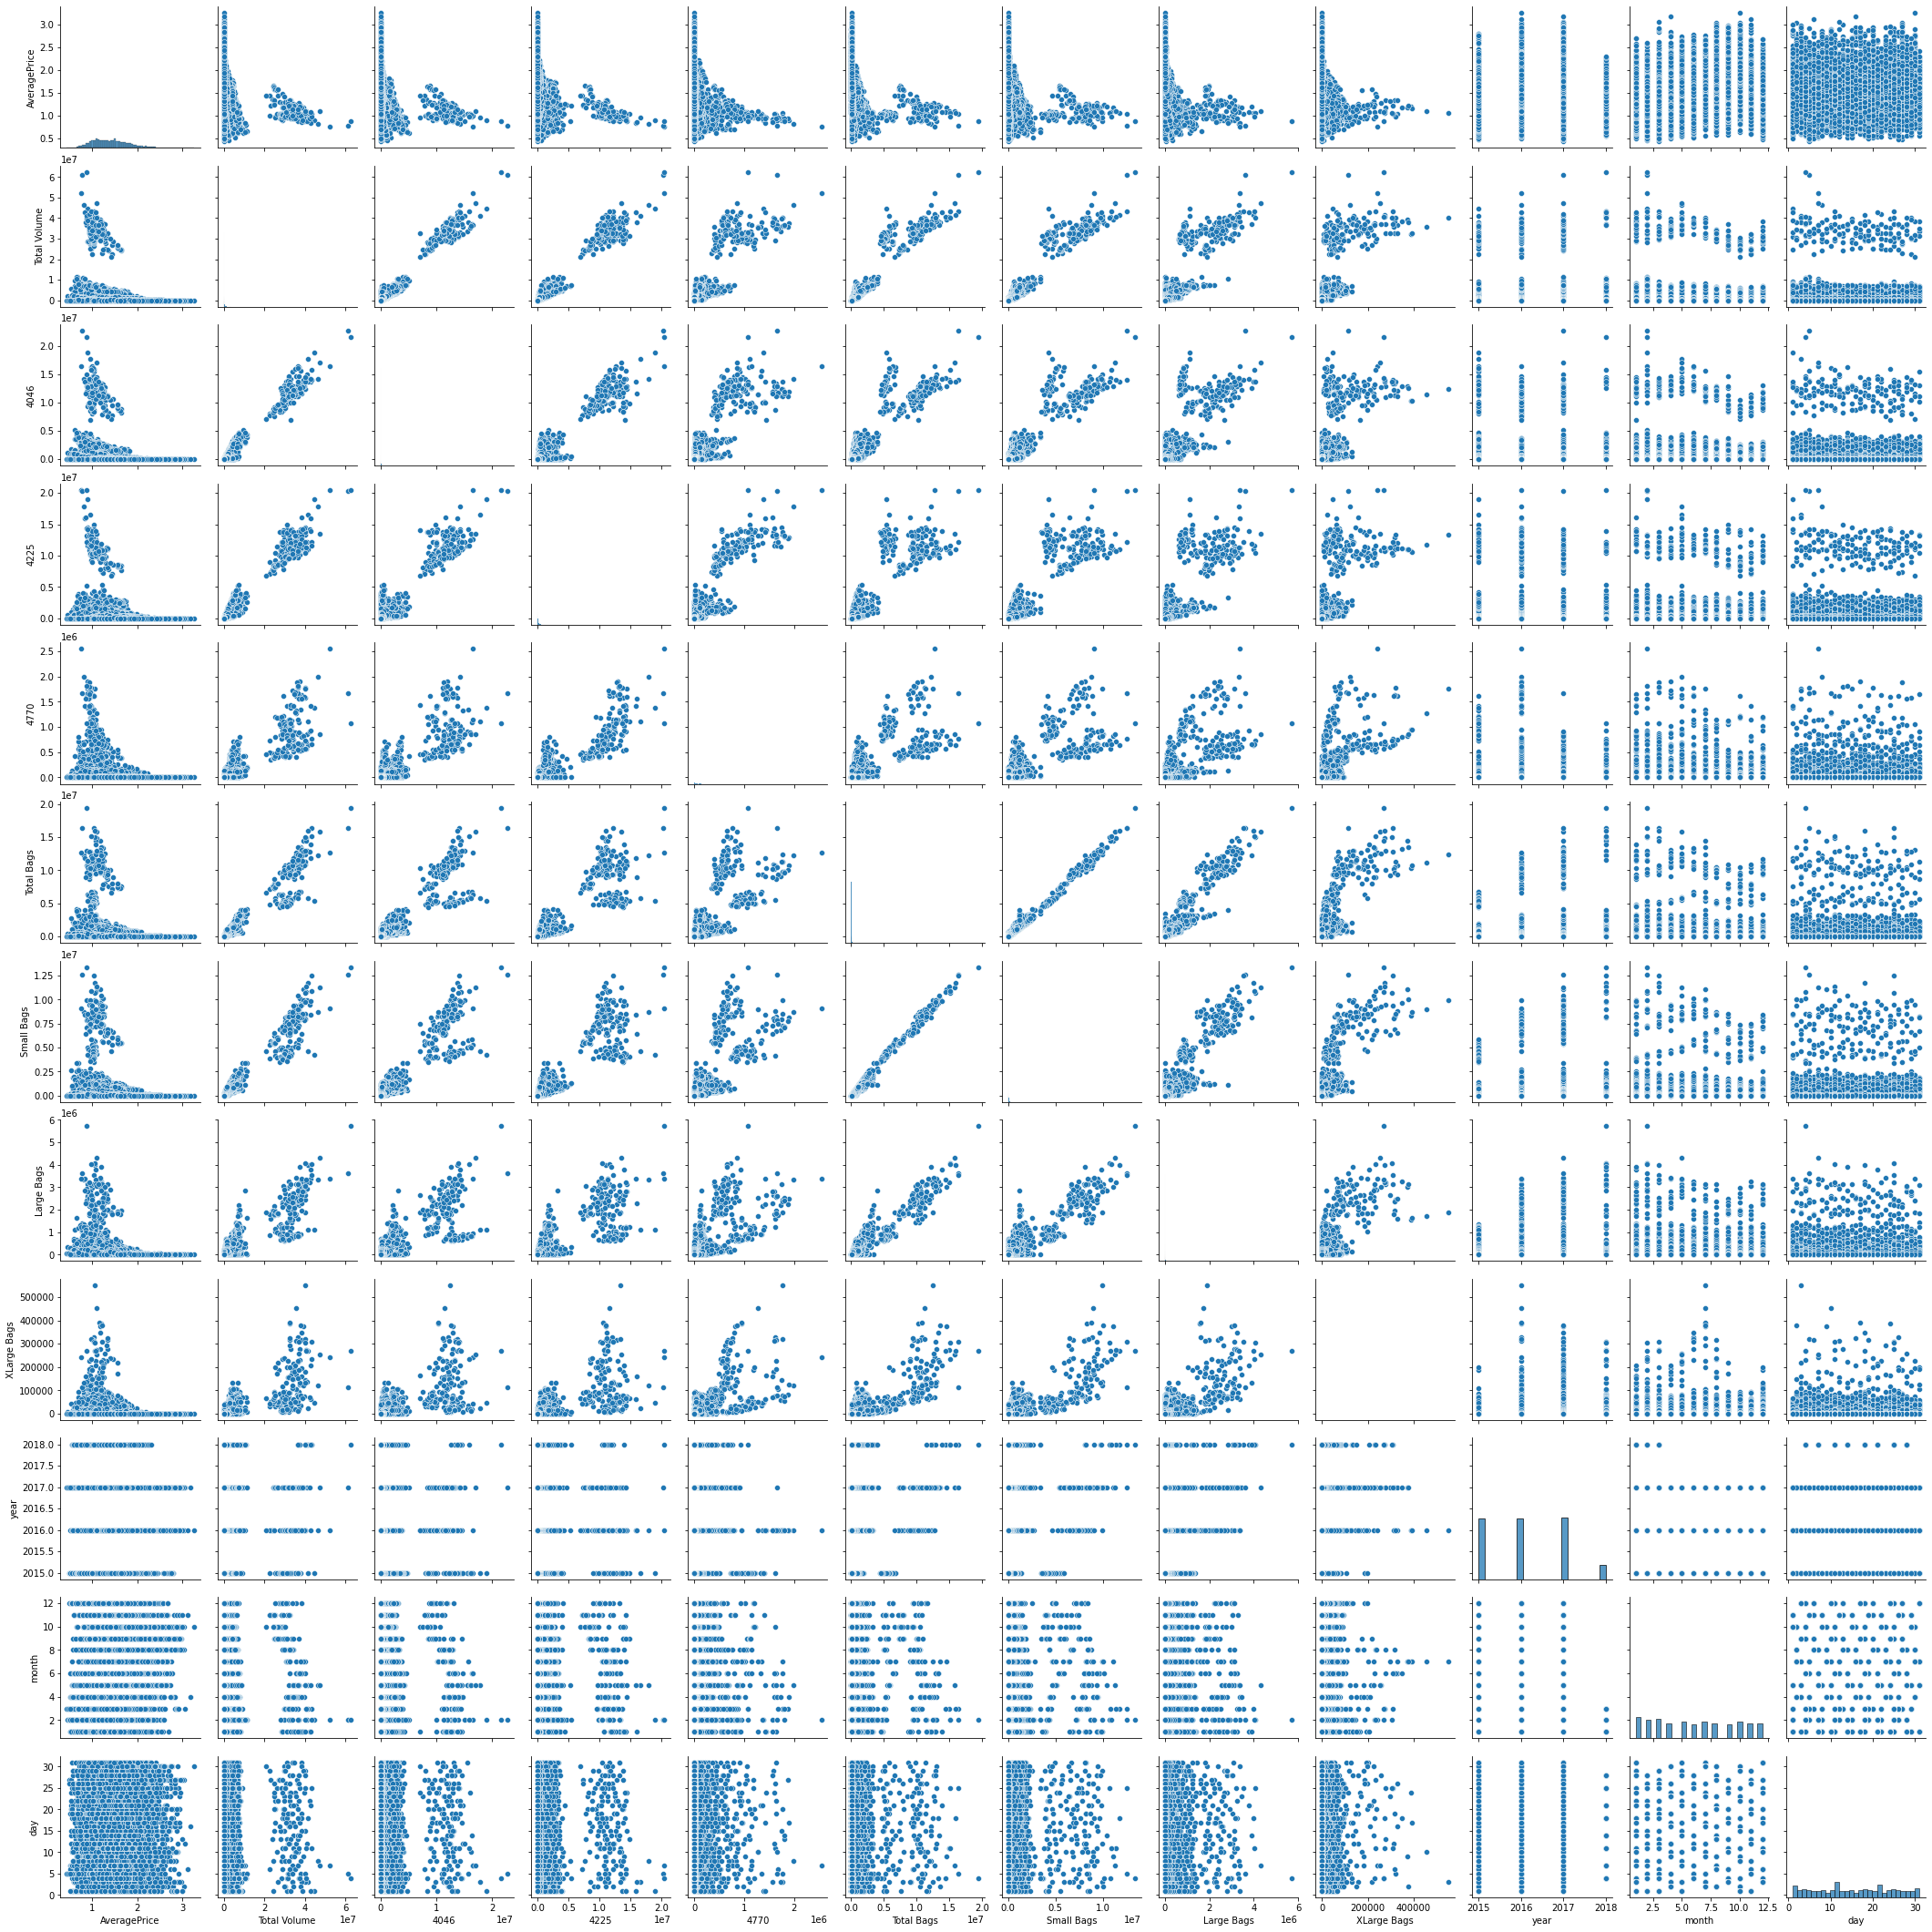

In [36]:
sns.pairplot(df)

##### Heatmap

Text(0.5, 1.0, 'Correlation Factors Heat Map')

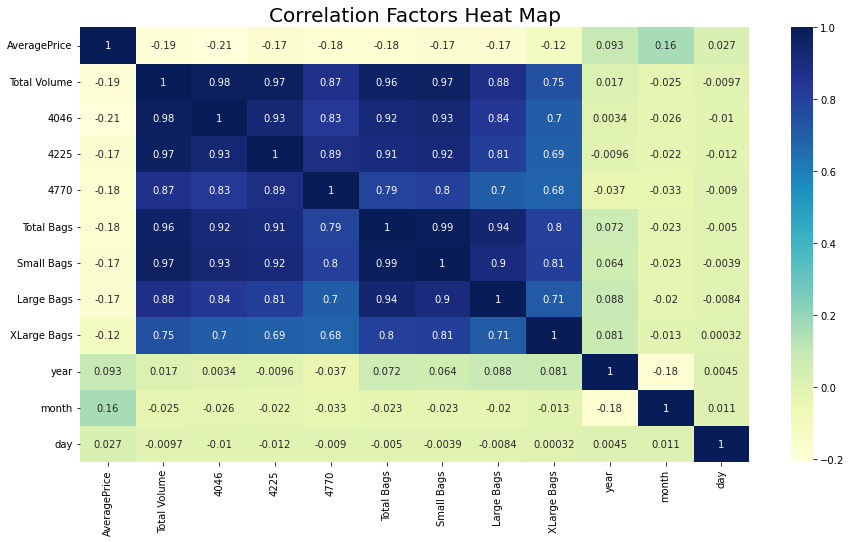

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

## Data Cleaning

### 1. Encoding categorical Data

In [38]:
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


### 2. Removing Outliers

In [39]:
z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [40]:
df.shape

(17651, 14)

In [41]:
initial_rows = 18249
rows_after_outlier_removal = 17651

loss_percentage = ((initial_rows - rows_after_outlier_removal) / initial_rows) * 100

print(f"Loss Percentage: {loss_percentage:.2f}%")


Loss Percentage: 3.28%


## Here i am copying DataFrame because in this project I have to predict Two Things AveragePrice and Region .

In [42]:
df1= df.copy()

# In This Project we have to predict two things AveragePrice and Region .

# First i am predicting AveragePrice

## So i will Clean data according to the AveragePrice prediction

### Checking Correlation

In [43]:
#correlation with target column
correlation_with_quality = df.corr()['AveragePrice'].abs().sort_values(ascending=False)
print(correlation_with_quality)

AveragePrice    1.000000
type            0.613150
4046            0.333577
Total Volume    0.332056
Total Bags      0.297323
Small Bags      0.275771
Large Bags      0.270915
4225            0.243988
4770            0.243465
XLarge Bags     0.152669
month           0.149502
year            0.091704
day             0.026819
region          0.003242
Name: AveragePrice, dtype: float64


Here i can see that day and region is low correlated with target column so i will delete both of them

In [44]:
df.drop(columns=['region','day',],axis=1, inplace=True)

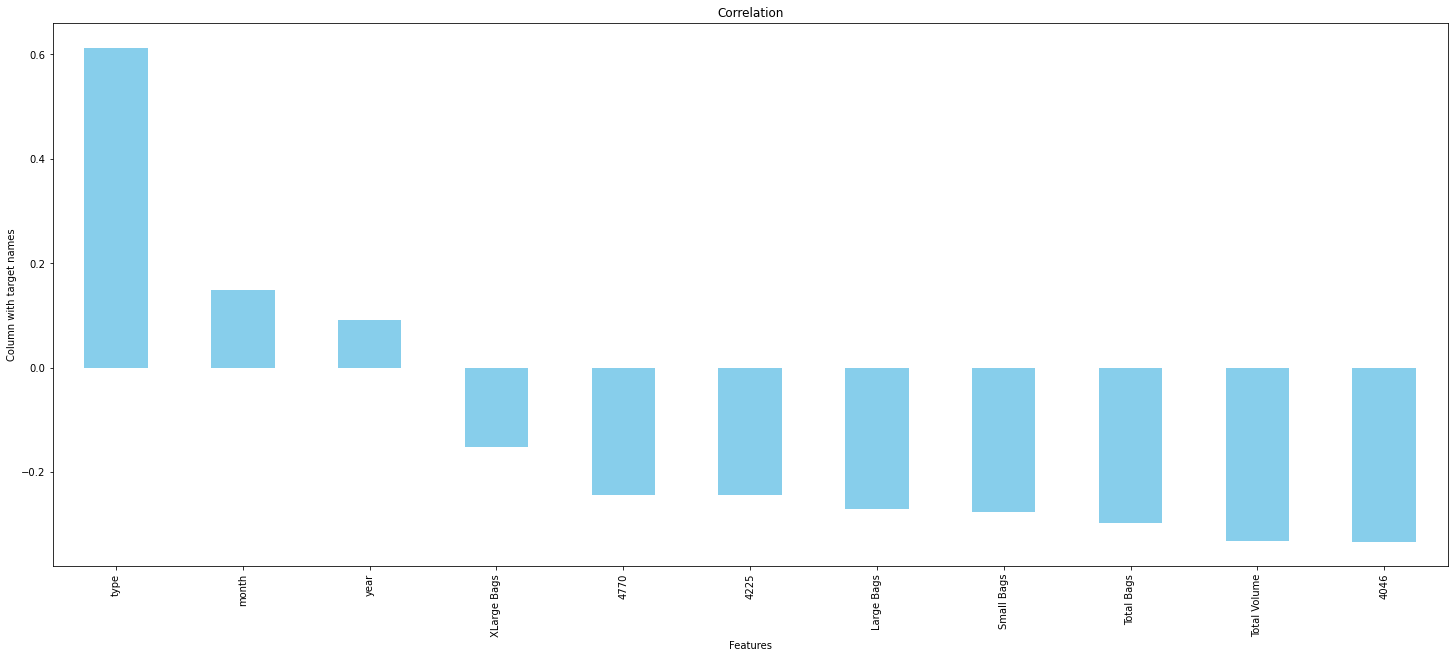

In [45]:
plt.figure(figsize =(25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

### Checking Correlation of Column with Column

In [46]:
#schecking correlation
df_corr = df.corr()
df_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,0.149502
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,-0.018645
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,-0.015797
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,-0.019844
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.027245
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,-0.010916
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,-0.013018
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,-0.001457
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,0.002843
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,-0.009499


##### Here i am writng function for finding thos columns who are highly correlated with each other

In [47]:
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [48]:
features_to_drop

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [49]:
#These columns are highly correlated with each other
df.drop(columns=['4046','4225','Small Bags','Total Bags'],axis=1, inplace=True)

#### Variance inflation factor

In [50]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,24.335862,AveragePrice
1,3.578808,Total Volume
2,2.086244,4770
3,2.007790,Large Bags
4,1.557572,XLarge Bags
5,3.649424,type
6,19.892083,year
7,4.213685,month


- We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [51]:
df.drop(columns=['year'],axis=1, inplace=True)

### Skewness of features

In [52]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
month           0.107408
dtype: float64

In [53]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

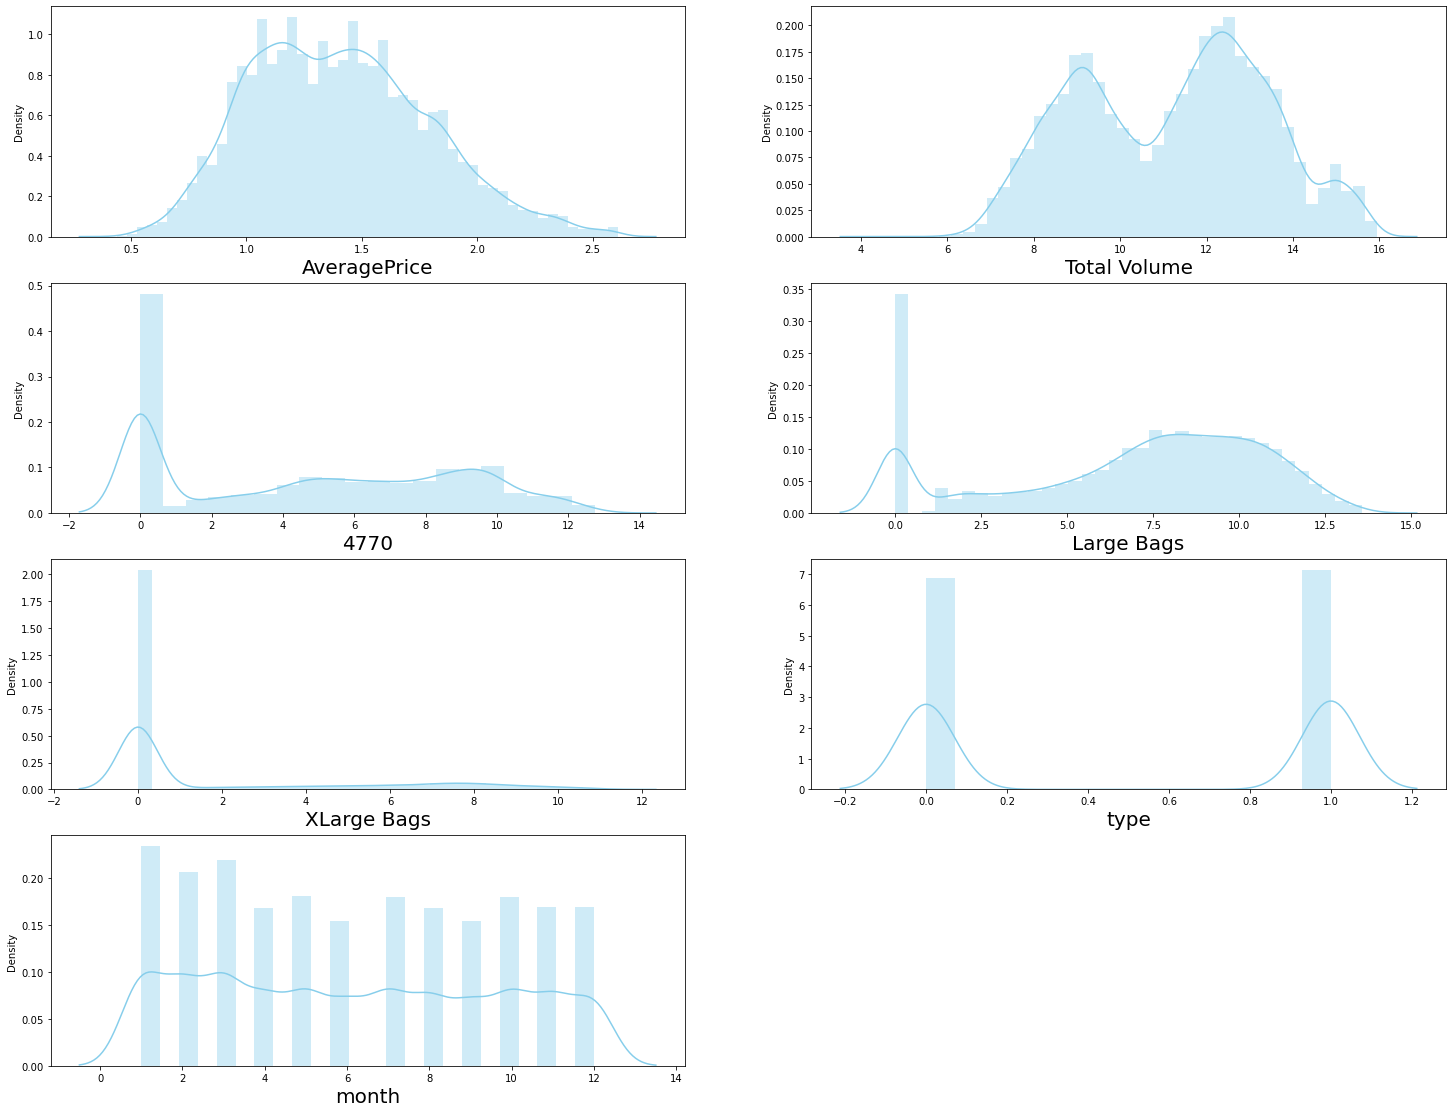

In [54]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

now data is looking little bit good

## Splitting the columns into feature and label


In [55]:
X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

## Scaling Data using StandardScaler

In [56]:
std=StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)

## Splitting the data for training and testing

#### Finding bset random state

In [57]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.4721646952742765 on Random_state 82


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=maxRS)

### Model Evaluation

In [59]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [60]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "xgb": XGBRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    mae,  rmse, r2_square = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square)

    r2_list.append(r2_square)

    print('=' * 35)
    print('\n')


Random Forest
Model Training Performance
RMSE: 0.22487263273379035
MAE: 0.16320550978372814
R2 score 0.660399880581813


Decision Tree
Model Training Performance
RMSE: 0.3058446291471649
MAE: 0.21255921730175079
R2 score 0.371802299931438


SVR
Model Training Performance
RMSE: 0.2546102492297303
MAE: 0.19512217791432557
R2 score 0.5646421403490594


Linear Regression
Model Training Performance
RMSE: 0.28035086787069935
MAE: 0.22178514688048231
R2 score 0.4721646952742765


KNeighbors Regressor
Model Training Performance
RMSE: 0.23803157974461236
MAE: 0.17579248197734296
R2 score 0.6194920078350766


SGD Regressor
Model Training Performance
RMSE: 0.28035590046852304
MAE: 0.22159232064898784
R2 score 0.47214574468804527


Gradient Boosting
Model Training Performance
RMSE: 0.24979164168416537
MAE: 0.19508352185477587
R2 score 0.5809648737611753


Bagging Regressor
Model Training Performance
RMSE: 0.2359664129558577
MAE: 0.17113259526261584
R2 score 0.6260659557683628


Lasso
Model Trainin

### Here RandomForest is giving highest accuracy so we will do hypermetertuning on it to increase its accuracy

In [62]:
param_grid = {'n_estimators':[30,60,80],'max_depth': [10,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt"]}

RF = RandomForestRegressor()

grid_search = GridSearchCV(RF, param_grid, cv=3,verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_estimator_.get_params()
best_score = grid_search.best_score_

best_RF = RandomForestRegressor(**best_params)
best_RF.fit(X_train, y_train)
y_pred = best_RF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression with Hyperparameter Tuning:")
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2*100)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=   0.7s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=   0.7s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=   0.6s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=   1.4s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=   1.5s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=   1.6s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; total time=   2.0s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; total time=   1.9s
[CV] END criterion=mse, max_depth=

[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=  33.5s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=  33.6s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=30; total time=  35.4s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time= 1.1min
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time= 1.0min
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=60; total time=  57.6s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; total time= 1.3min
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; total time= 1.5min
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, n_estimators=80; to

After Hyperparameter Tuning it is giving 65% Accuracy

### Saving Best Model for Predicting AveragePrice

In [65]:
filename = 'AveragePrice_best_model.pkl'
pickle.dump(best_RF, open(filename, 'wb'))

# Now i am doing Prediction on the basis of Region

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score

#### Here i will use our copy dataset from which we removed the outliers

In [67]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


##### Here i'll check correlation with target column

In [68]:
#correlation with target column
correlation_with_quality = df1.corr()['region'].abs().sort_values(ascending=False)
print(correlation_with_quality)

region          1.000000
Large Bags      0.127635
4046            0.119067
4770            0.095972
Total Bags      0.085892
Total Volume    0.076676
Small Bags      0.065976
XLarge Bags     0.044338
type            0.018409
4225            0.011002
year            0.004417
AveragePrice    0.003242
month           0.000119
day             0.000046
Name: region, dtype: float64


here Day Month is vary less correlated with target column so we will delete them

In [69]:
df1.drop(columns=['day','month'],axis=1, inplace=True)

In [70]:
df1.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0


In [71]:
#checking correlation
df1_corr = df1.corr()
df1_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-0.003242
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,0.076676
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,0.119067
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,0.011002
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.095972
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,0.085892
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,0.065976
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,0.127635
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-0.044338
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,0.018409


##### Here i am writing a function for those columns which are highly correlated with each other

In [72]:
correlation_threshold = 0.8
mask = df1_corr.abs() >= correlation_threshold
features_to_drop1 = set()
for i in range(len(df1_corr.columns)):
    for j in range(i+1, len(df1_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df1_corr.columns[i]
            colname_j = df1_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop1.add(colname_j)

In [73]:
features_to_drop1

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [74]:
df1.drop(columns=['4046', '4225', 'Small Bags', 'Total Bags'],axis=1, inplace=True)

#### variance_inflation_factor

In [75]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,23.400574,AveragePrice
1,3.630627,Total Volume
2,2.139109,4770
3,2.018180,Large Bags
4,1.561434,XLarge Bags
5,3.595851,type
6,21.548592,year
7,4.087439,region


vif of year is high so we will remove year for avoide multicollinearity

In [76]:
df1.drop(columns=['year'],axis=1, inplace=True)

In [77]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,6.238504,AveragePrice
1,3.603315,Total Volume
2,2.114342,4770
3,2.006016,Large Bags
4,1.560551,XLarge Bags
5,3.378061,type
6,3.576051,region


now there is no **multicollinearity**

#### Checking skewness

In [78]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

##### Handling skewness by log method

In [79]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

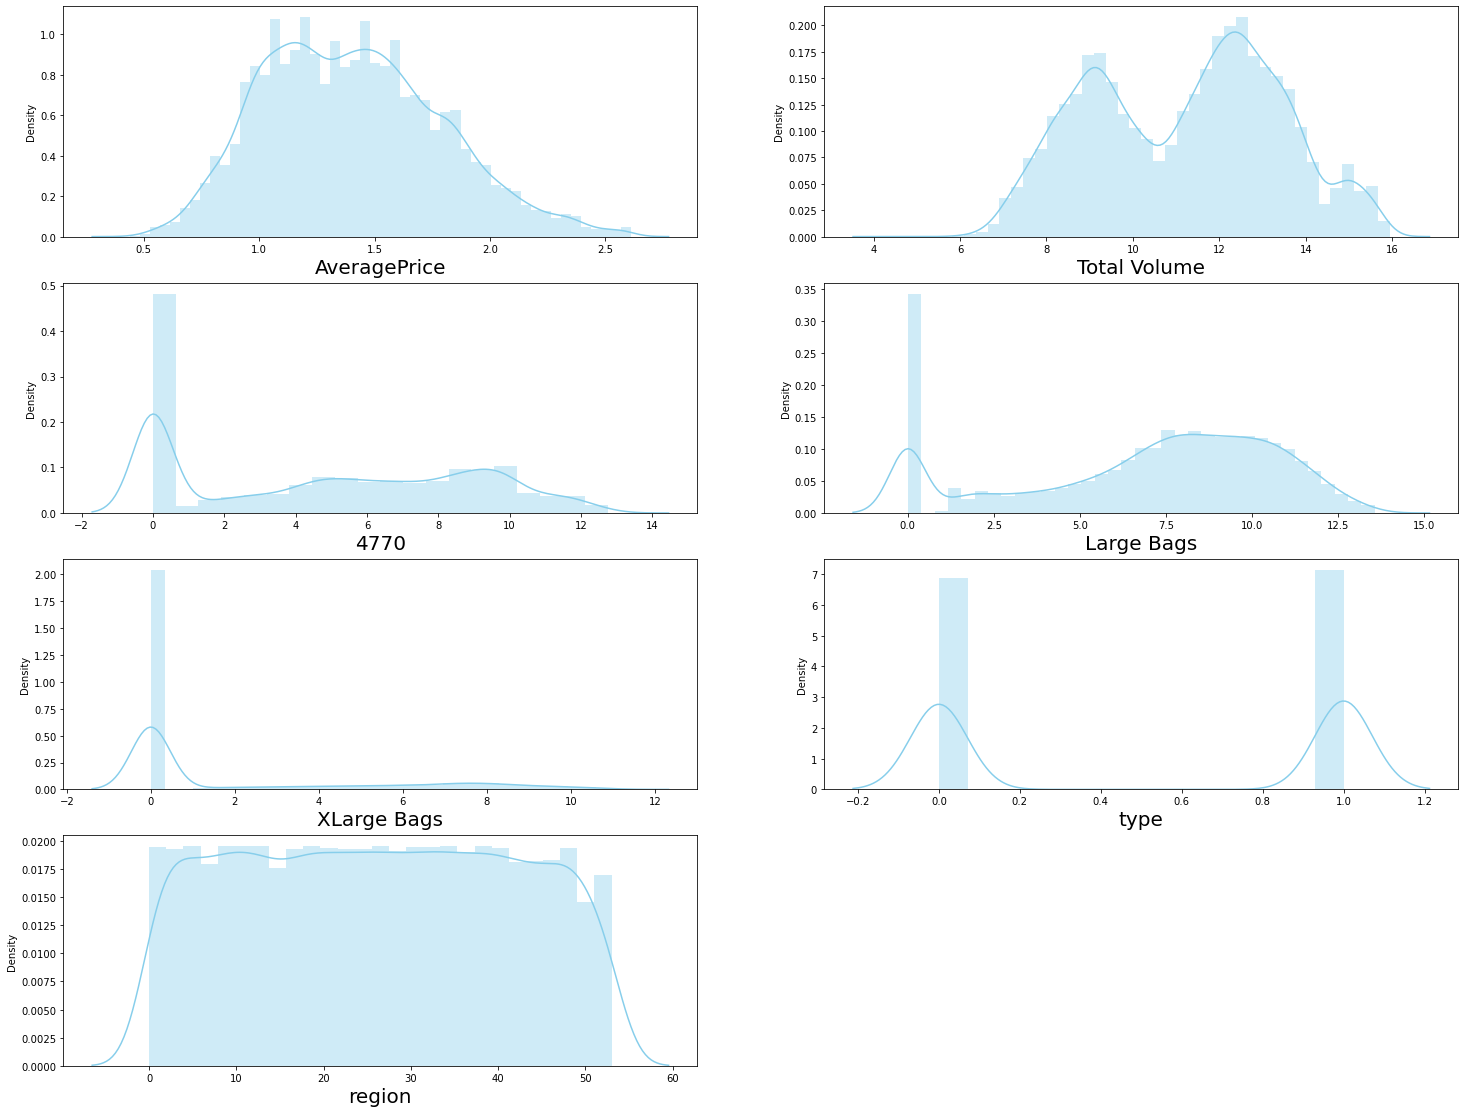

In [80]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

#### Separating feature and target column

In [81]:
X1 = df1.drop("region",axis=1)
y1 = df1["region"]

#### Scaling Data using StandardScaler

In [82]:
std=StandardScaler()
X1 = pd.DataFrame(std.fit_transform(X1), columns=X1.columns)

### Train test split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.22,random_state=42)

### Model evaluation

In [87]:


def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

models = {
    "Random_Forest": RandomForestClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNeighbors_Classifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

trained_model_list = []
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    accuracy_list.append(accuracy)

    print('=' * 35)
    print('\n')


Random_Forest
Model Training Performance
Accuracy: 0.664778578784758
Precision: 0.6676595375243636
Recall: 0.664778578784758
F1 Score: 0.6637788479339352


Decision_Tree
Model Training Performance
Accuracy: 0.546086508753862
Precision: 0.5507286830160275
Recall: 0.546086508753862
F1 Score: 0.5465958977000714


SVM
Model Training Performance
Accuracy: 0.49279093717816685
Precision: 0.5156114191579538
Recall: 0.49279093717816685
F1 Score: 0.483723332144677


KNeighbors_Classifier
Model Training Performance
Accuracy: 0.588053553038105
Precision: 0.5984796802913458
Recall: 0.588053553038105
F1 Score: 0.5877176103720685


XGBoost
Model Training Performance
Accuracy: 0.6351699279093718
Precision: 0.6402039482420997
Recall: 0.6351699279093718
F1 Score: 0.6349303383748574




#### After seeing all the accuracy it is found that random forest is giving high accuracy

### Here RandomForestClassifier is giving highest accuracy so we will do hypermetertuning on it to increase its accuracy

In [88]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 20], 
    'min_samples_leaf': [1, 4],    
    'max_features': ['auto', 'sqrt'],
}

# Create the Random Forest Classifier
rf = RandomForestClassifier()

# Initialize Grid Search with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

# Perform the Grid Search on your training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters:
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
Test Set Accuracy: 0.666323377960865


after hyper parameter tuning accuracy is **66%**

### saving best Classification model

In [89]:
filename = 'region_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

# PROJECT COMPLETED